In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile,os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files
%matplotlib inline

In [32]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/assets-cancer'
melanoma_dir = os.path.join(base_dir, 'melanoma')
nevus_dir = os.path.join(base_dir, 'novus')
dermato_dir = os.path.join(base_dir, 'dermatofibroma')

In [33]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/assets-cancer')

['melanoma', 'novus', 'dermatofibroma']

In [34]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)
 
val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2                                      
)

In [35]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 10,
    color_mode = "rgb",
    shuffle = True,
    class_mode = "categorical",
    subset = "training"
    
)

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size = (150,150),
    batch_size = 10,
    color_mode = "rgb",
    shuffle = False,
    class_mode = "categorical",
    subset = "validation"
    
)

Found 236 images belonging to 3 classes.
Found 59 images belonging to 3 classes.


In [36]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [37]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [38]:
accuracy = 0.97

class func_callback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') >= accuracy):
			print("Akurasi Telah Mencapai %2.2f%% , Proses Training Dihentikan." %(accuracy*100))
			self.model.stop_training = True
      
callback = func_callback()

In [54]:
model.fit(
      train_generator,
      steps_per_epoch=9,  
      epochs=25, 
      validation_data=validation_generator, 
      validation_steps=1,  
      verbose=2,
      callbacks=[callback])

Epoch 1/25
9/9 - 5s - loss: 0.2902 - accuracy: 0.8194 - val_loss: 0.3479 - val_accuracy: 0.8125 - 5s/epoch - 599ms/step
Epoch 2/25
9/9 - 5s - loss: 0.2995 - accuracy: 0.7917 - val_loss: 0.3607 - val_accuracy: 0.8125 - 5s/epoch - 611ms/step
Epoch 3/25
9/9 - 5s - loss: 0.3230 - accuracy: 0.7786 - val_loss: 0.1484 - val_accuracy: 0.8750 - 5s/epoch - 587ms/step
Epoch 4/25
9/9 - 6s - loss: 0.2800 - accuracy: 0.8542 - val_loss: 0.3245 - val_accuracy: 0.7500 - 6s/epoch - 637ms/step
Epoch 5/25
9/9 - 5s - loss: 0.2289 - accuracy: 0.8643 - val_loss: 0.3287 - val_accuracy: 0.7500 - 5s/epoch - 605ms/step
Epoch 6/25
9/9 - 6s - loss: 0.3076 - accuracy: 0.8071 - val_loss: 0.5554 - val_accuracy: 0.6250 - 6s/epoch - 636ms/step
Epoch 7/25
9/9 - 5s - loss: 0.2478 - accuracy: 0.8403 - val_loss: 0.1417 - val_accuracy: 0.9375 - 5s/epoch - 591ms/step
Epoch 8/25
9/9 - 5s - loss: 0.2995 - accuracy: 0.8333 - val_loss: 0.2466 - val_accuracy: 0.8750 - 5s/epoch - 606ms/step
Epoch 9/25
9/9 - 5s - loss: 0.2482 - acc

Saving ISIC_0000028.jpg to ISIC_0000028 (1).jpg
1/1 [==============================] - 0s 17ms/step
ISIC_0000028.jpg
novus


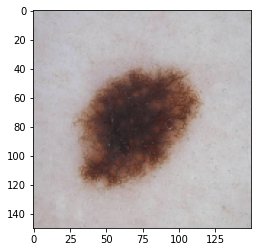

In [57]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=59)  
  print(fn)
  if classes[0, 0] == 1:
    print('dermatofibroma')
  elif classes[0, 1] == 1:
    print('melanoma')
  elif classes[0, 2] == 1:
    print('novus')